In [30]:
# !pip install opencv-contrib-python==4.5.1.48
# print(cv2.__version__)


4.10.0


In [2]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
# from google.colab.patches import cv2_imshow


In [16]:
import cv2
import numpy as np

# Загрузка двух последовательных кадров сцены
in1 = cv2.imread('r0137_jpg/small/uvi_20200107_0_w.jpg', cv2.IMREAD_GRAYSCALE)
in2 = cv2.imread('r0137_jpg/small/uvi_20200107_1_w.jpg', cv2.IMREAD_GRAYSCALE)

# Параметры для Farneback
pyr_scale = 0.4
levels = 3
winsize = 16
iterations = 10
poly_n = 5
poly_sigma = 1.2
flags = 0

# Вычисление оптического потока с Farneback
flow_mat = cv2.calcOpticalFlowFarneback(in1, in2, None, pyr_scale, levels, winsize, iterations, poly_n, poly_sigma, flags)

# Преобразование потока для отображения
magnitude, angle = cv2.cartToPolar(flow_mat[..., 0], flow_mat[..., 1])
hsv = np.zeros((in1.shape[0], in1.shape[1], 3), dtype=np.uint8)
hsv[..., 0] = angle * 180 / np.pi / 2
hsv[..., 1] = 255
hsv[..., 2] = cv2.normalize(magnitude, None, 0, 255, cv2.NORM_MINMAX)
flow_rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)

# Отображение
cv2.imshow("Optical Flow (Farneback)", flow_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()


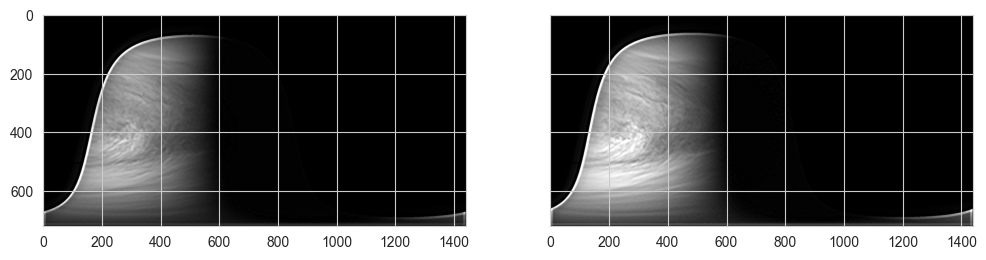

In [27]:
# Загрузка изображений
in1 = cv2.imread('r0137_jpg/small/uvi_20200107_0_w.jpg')
in2 = cv2.imread('r0137_jpg/small/uvi_20200107_1_w.jpg')

# Проверка, что изображения загружены
if in1 is None or in2 is None:
    print('Could not open or find the images!')
    exit(0)
    
fig, (ax0, ax1) = plt.subplots(
    nrows=1, ncols=2, figsize=(12, 5), sharex=True, sharey=True
)

ax0.imshow(in1, cmap=plt.cm.gray)
ax0.axis('on')
ax1.imshow(in2, cmap=plt.cm.gray)
ax1.axis('on')

plt.show()

In [ ]:
# in1 = cv2.imread('Pairs/3.jpg')
# in1.shape

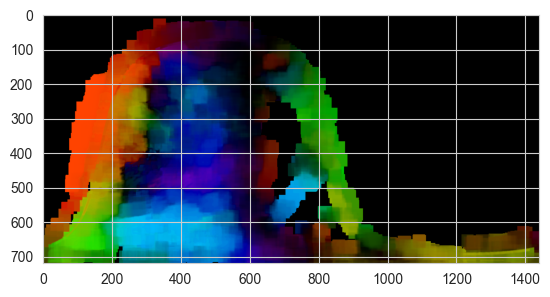

In [29]:


# Вычисление Optical Flow
flow = cv2.optflow.createOptFlow_SimpleFlow()

flow_mat = flow.calc(in1, in2, None)
flow_mat = np.nan_to_num(flow_mat)

# Отображение Optical Flow
hsv = np.zeros_like(in1)
hsv[..., 1] = 255

mag, ang = cv2.cartToPolar(flow_mat[..., 0], flow_mat[..., 1])
# mag = np.nan_to_num(mag)
# ang = np.nan_to_num(ang)

hsv[..., 0] = ang * 180 / np.pi / 2
hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)
rgb = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
gray = cv2.cvtColor(rgb, cv2.COLOR_BGR2GRAY)

%matplotlib inline

plt.imshow(rgb)
plt.show()

In [3]:
def dense_optical_flow(method, video_path, params=[], to_gray=False):
    # Read the video and first frame
    cap = cv2.VideoCapture(video_path)

    ret, old_frame = cap.read()

    # crate HSV & make Value a constant
    hsv = np.zeros_like(old_frame)
    hsv[..., 1] = 255

    # Preprocessing for exact method
    if to_gray:
        old_frame = cv2.cvtColor(old_frame, cv2.COLOR_BGR2GRAY)

In [ ]:
import cv2
import numpy as np
import os

def calculate_rlof_flow(image1_path, image2_path):
    """
    Вычисляет оптический поток между двумя изображениями.
    
    :param image1_path: Путь к первому изображению.
    :param image2_path: Путь ко второму изображению.
    :return: Оптический поток (numpy массив).
    """
    # Загрузка двух изображений
    old_frame = cv2.imread(image1_path)
    new_frame = cv2.imread(image2_path)
    
    # Проверка на успешную загрузку изображений
    if old_frame is None or new_frame is None:
        raise FileNotFoundError(f"Не удалось загрузить изображения: {image1_path} или {image2_path}")
    
    # Вычисление оптического потока
    method = cv2.optflow.calcOpticalFlowDenseRLOF
    flow = method(old_frame, new_frame, None)
    
    return flow

def process_dataset(dataset_path, output_path):
    """
    Обрабатывает все пары изображений в папках датасета и сохраняет результаты потоков.
    
    :param dataset_path: Путь к корневой папке с датасетом.
    :param output_path: Путь к папке для сохранения результатов.
    """
    if not os.path.exists(output_path):
        os.makedirs(output_path)
    
    for folder_name in os.listdir(dataset_path):
        folder_path = os.path.join(dataset_path, folder_name)
        if not os.path.isdir(folder_path):
            continue
        
        # Пути к изображениям
        img1_path = os.path.join(folder_path, "img1.png")
        img2_path = os.path.join(folder_path, "img2.png")
        
        if not os.path.exists(img1_path) or not os.path.exists(img2_path):
            print(f"Пропуск папки {folder_name}: отсутствует img1.png или img2.png")
            continue
        
        try:
            # Вычисление оптического потока
            flow = calculate_rlof_flow(img1_path, img2_path)
            
            # Сохранение результата
            flow_output_file = os.path.join(output_path, f"RLOF_flow_{folder_name}.npy")
            np.save(flow_output_file, flow)
            print(f"Сохранен поток для папки {folder_name}: {flow_output_file}")
        
        except Exception as e:
            print(f"Ошибка при обработке папки {folder_name}: {e}")

# Пути к датасету и выходной папке
dataset_path = "/home/jupyter/datasphere/project/Venus_dataset/images"
output_path = "/home/jupyter/datasphere/project/RLOF_flows"

# Запуск обработки
process_dataset(dataset_path, output_path)


Сохранен поток для папки 20180331_080446_100445: /home/jupyter/datasphere/project/RLOF_flows/RLOF_flow_20180331_080446_100445.npy
Сохранен поток для папки 20180331_100445_120443: /home/jupyter/datasphere/project/RLOF_flows/RLOF_flow_20180331_100445_120443.npy
Сохранен поток для папки 20180331_140445_160444: /home/jupyter/datasphere/project/RLOF_flows/RLOF_flow_20180331_140445_160444.npy
Сохранен поток для папки 20180331_160444_180445: /home/jupyter/datasphere/project/RLOF_flows/RLOF_flow_20180331_160444_180445.npy
Сохранен поток для папки 20180331_180445_200444: /home/jupyter/datasphere/project/RLOF_flows/RLOF_flow_20180331_180445_200444.npy
Сохранен поток для папки 20180331_200444_220444: /home/jupyter/datasphere/project/RLOF_flows/RLOF_flow_20180331_200444_220444.npy
Сохранен поток для папки 20180401_100445_120444: /home/jupyter/datasphere/project/RLOF_flows/RLOF_flow_20180401_100445_120444.npy
Сохранен поток для папки 20180401_120444_140444: /home/jupyter/datasphere/project/RLOF_flo

In [39]:
# method = cv2.optflow.calcOpticalFlowDenseRLOF

# old_frame = cv2.imread("r0137_jpg/small/uvi_20200107_0_w.jpg")
# new_frame = cv2.imread("r0137_jpg/small/uvi_20200107_1_w.jpg")

# print(f"{old_frame.shape=} {new_frame.shape=}")

# hsv = np.zeros_like(old_frame)
# hsv[..., 1] = 255

# frame_copy = new_frame

# # Calculate Optical Flow
# flow_mat = method(old_frame, new_frame, None)

# # Encoding: convert the algorithm's output into Polar coordinates
# mag, ang = cv2.cartToPolar(flow[..., 0], flow[..., 1])
# # Use Hue and Value to encode the Optical Flow
# hsv[..., 0] = ang * 180 / np.pi / 2
# hsv[..., 2] = cv2.normalize(mag, None, 0, 255, cv2.NORM_MINMAX)

# # Convert HSV image into BGR for demo
# bgr = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)
# # cv2_imshow(frame_copy)
# # cv2_imshow(bgr)

old_frame.shape=(720, 1440, 3) new_frame.shape=(720, 1440, 3)


TypeError: 'cv2.DenseOpticalFlow' object is not subscriptable

In [9]:
flow_mat = np.load('/home/jupyter/datasphere/project/RLOF_flows/RLOF_flow_20180412_180445_200446.npy')

# Подогнал размерность предсказанного потока к размерности gt
print(flow_mat.shape)
estimated_flow = np.moveaxis(flow_mat, -1, 0)
estimated_flow.shape

(720, 1440, 2)


(2, 720, 1440)

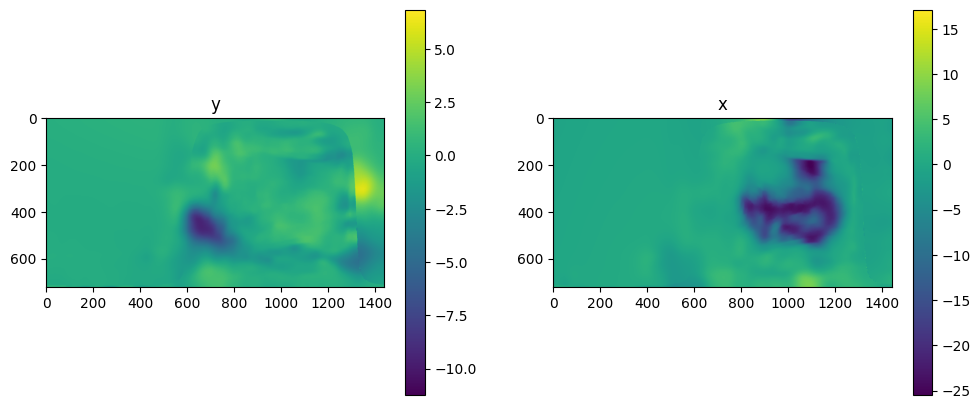

In [10]:
# визуализация предсказанного потока

estimated_flow[[0, 1], :, :] = estimated_flow[[1, 0], :, :]

# shape = in1[:, :].shape
shape = (1440, 720)

fig, axs = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)

img = axs[0].imshow(estimated_flow[0], cmap="viridis")
axs[0].set(title='y')
plt.colorbar(img, ax=axs[0])
img = axs[1].imshow(estimated_flow[1], cmap="viridis")
axs[1].set(title='x')
plt.colorbar(img, ax=axs[1])
plt.show()

In [42]:
# Задайте размерности массива
N = 1  # например, количество временных шагов
unfiltered_rlof_frames = np.zeros((N, 2, 720, 1440))

# Заполнение массива (предполагается, что estimated_flow - массив с размерностью (2, 720, 1440))
for i in range(N):
    unfiltered_rlof_frames[i] = estimated_flow

unfiltered_rlof_frames.shape

(1, 2, 720, 1440)

In [43]:
# Расчет скоростей

# Константы
r = 6051.8 * 1000
h = 70 * 1000
latitudes = np.radians(np.linspace(-89.9375, 89.9375, 720))  # Широты
longitudes = np.radians(np.linspace(0.0625, 359.9375, 1440))  # Долготы

unfiltered_sf_speeds = np.zeros_like(unfiltered_sf_frames)
unfiltered_sf_speeds[:, 0, :, :] = unfiltered_sf_frames[:, 0, :, :] * 360 / 1440 # перевести дельты из пикселей в градусы (x)
unfiltered_sf_speeds[:, 1, :, :] = unfiltered_sf_frames[:, 1, :, :] * 180 / 720 # (y)

unfiltered_sf_speeds[:, 0, :, :] = (np.radians(unfiltered_sf_speeds[:, 0, :, :]) * (r + h) * np.cos(latitudes[:, np.newaxis])) / (2 * 60 * 60)
unfiltered_sf_speeds[:, 1, :, :] = (np.radians(unfiltered_sf_speeds[:, 1, :, :]) * (r + h)) / (2 * 60 * 60)

In [44]:
# Фильтрация скоростей (занулить области, не отснятые камерой и неадекватные скорости)

filtered_sf_speeds = []

for i in range(len(unfiltered_sf_speeds)):
    data = np.copy(unfiltered_sf_speeds[i])
    # img_1 = np.array(imageio.imread(f'r0137_jpg/small/uvi_20200107_{i}.jpg'))
    # img_2 = np.array(imageio.imread(f'r0137_jpg/small/uvi_20200107_{i+1}.jpg'))
    frame_1 = cv2.imread(f'r0137_jpg/small/uvi_20200107_{i}.jpg')
    frame_2 = cv2.imread(f'r0137_jpg/small/uvi_20200107_{i+1}.jpg')
    frame_1 = cv2.cvtColor(frame_1, cv2.COLOR_BGR2GRAY)
    frame_2 = cv2.cvtColor(frame_2, cv2.COLOR_BGR2GRAY)
    non_zero_1 = frame_1 != 0
    non_zero_2 = frame_2 != 0
    
    filtered_data = data
    # filtered_data = filtered_data * [non_zero_1]* [non_zero_2]

    # filtered_data *= (filtered_data[0] < 0)
    # filtered_data *= (filtered_data[0] > -250)
    # filtered_data *= ( abs(filtered_data[0] / (filtered_data[1] + 1e-10)) >= 3.5 )
    
    filtered_sf_speeds.append(filtered_data)
    # print(abs(filtered_data[0]) / (filtered_data[1] + 1e-10) >= 3.5)
    # print(filtered_data.shape)

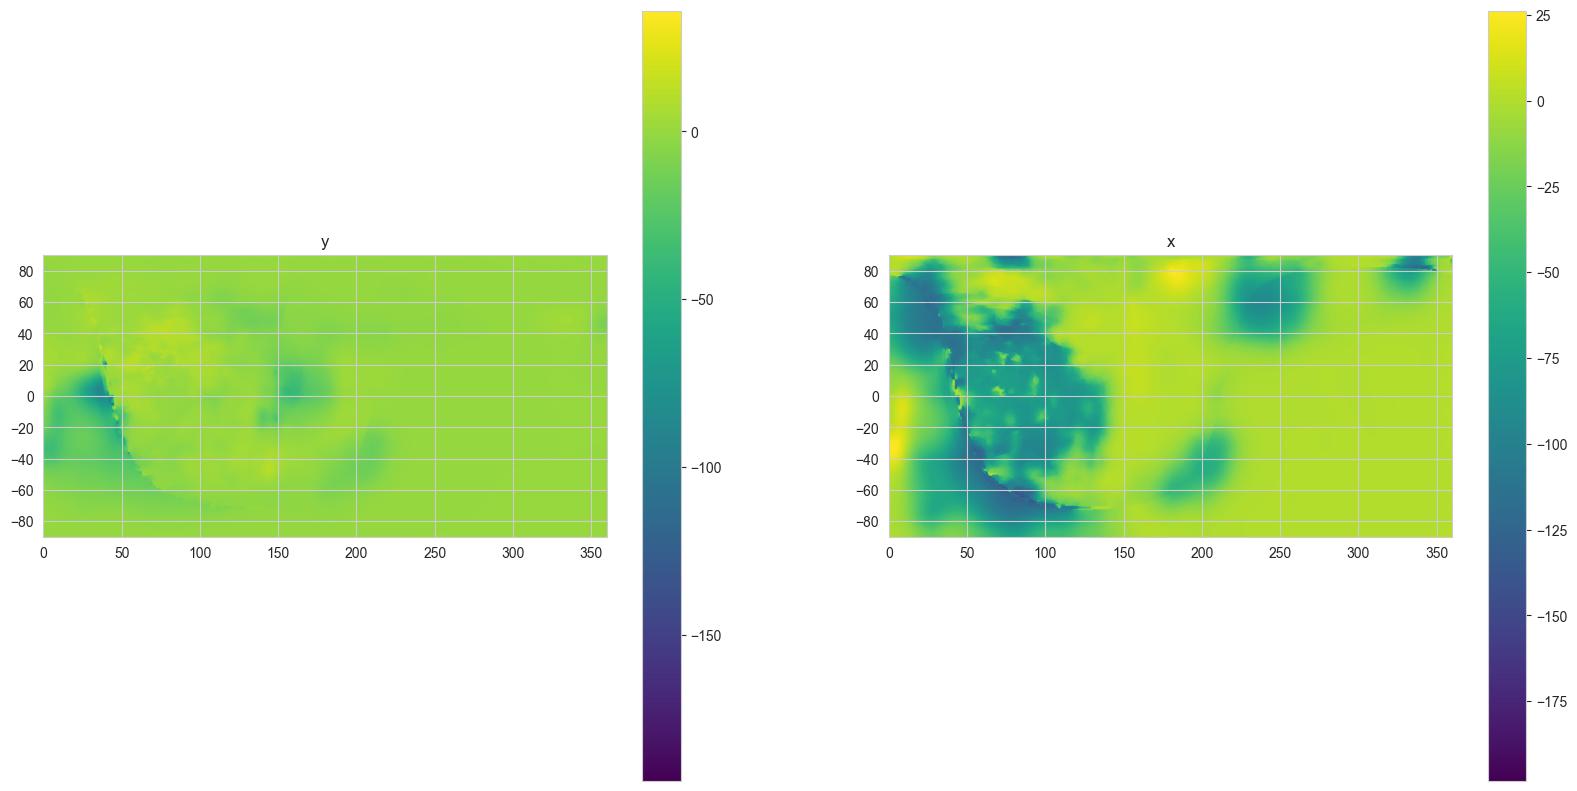

In [46]:
# проверяю на визуализации

fig, axs = plt.subplots(figsize=(20, 10), nrows=1, ncols=2)

img = axs[0].imshow(filtered_sf_speeds[0][0], cmap="viridis", 
                  extent=[0, 360, -90, 90], origin='lower', aspect='equal')
axs[0].set(title='y')
plt.colorbar(img, ax=axs[0])

img = axs[1].imshow(filtered_sf_speeds[0][1], cmap="viridis", 
                  extent=[0, 360, -90, 90], origin='lower', aspect='equal')
axs[1].set(title='x')

plt.colorbar(img, ax=axs[1])
plt.show()

In [ ]:
# визуализация gt
gt_flow = np.load('delta3-4.npy')
print(gt_flow.shape)

xs = gt_flow[0]
ys = gt_flow[1]

fig, axs = plt.subplots(figsize=(12, 5), nrows=1, ncols=2)

img = axs[0].imshow(ys.reshape(shape), cmap="viridis")
axs[0].set(title='y')
plt.colorbar(img, ax=axs[0])
img = axs[1].imshow(xs.reshape(shape), cmap="viridis")
axs[1].set(title='x')
plt.colorbar(img, ax=axs[1])
plt.show()

In [ ]:
# хоть визуально они и похожи, предсказанный определаяет скорость в два раза ниже, чем есть на самом деле

print(estimated_flow.mean())
print(gt_flow.mean())

Расчет метрики

In [ ]:
# находим end-point error для каждого пикселя по х, у, затем берем среднее.
# оно низкое, потому что в большей части изображения ничего не происходит

import numpy as np

# flow_mat = np.nan_to_num(flow_mat)

# смотрим разницу между предсказанным и gt
diff = estimated_flow - gt_flow
print(f"diff: {diff}")
# Вычисление квадратов разностей
squared_diff = np.square(diff)
# print(f"squared diff: {squared_diff}")

# # Суммирование квадратов разностей (для многоканальных снимков)
# summed_squared_diff = np.sum(squared_diff, axis=0)

# Вычисление квадратного корня из суммы квадратов (евклидово расстояние)
epe = np.sqrt(squared_diff)

# Вычисление среднего значения расстояний (EPE)
mean_epe = np.mean(epe)

print(f"mean EPE: {mean_epe}")


In [ ]:
epe.shape

In [ ]:
# визуализация разницы
print(diff.shape)

xs = diff[0]
ys = diff[1]

xs_2 = squared_diff[0]
ys_2 = squared_diff[1]

fig, axs = plt.subplots(figsize=(12, 12), nrows=2, ncols=2)

img = axs[0][0].imshow(ys.reshape(shape), cmap="viridis")
axs[0][0].set(title='y')
plt.colorbar(img, ax=axs[0][0])
img = axs[0][1].imshow(xs.reshape(shape), cmap="viridis")
axs[0][1].set(title='x')
plt.colorbar(img, ax=axs[0][1])

img = axs[1][0].imshow(ys_2.reshape(shape), cmap="viridis")
axs[1][0].set(title='y')
plt.colorbar(img, ax=axs[1][0])
img = axs[1][1].imshow(xs_2.reshape(shape), cmap="viridis")
axs[1][1].set(title='x')
plt.colorbar(img, ax=axs[1][1])

plt.show()

In [ ]:
print(diff.max())
print(diff.min())

In [ ]:
import numpy as np

# Порог для EPE
threshold = 3.0

# Вычисление бинарной маски для пикселей, где EPE больше порога
error_mask = (epe > threshold)

# Вычисление количества True Positive (TP)
TP = np.sum(~error_mask)

# Вычисление количества False Positive (FP) и False Negative (FN)
FP = FN = np.sum(error_mask)
 
# Вычисление F1-all
F1 = 2*TP / (2*TP + FP + FN)

print(f"F1-all: {F1}")


In [ ]:
# pip install pandas

In [ ]:
# pip install seaborn

In [ ]:
import pandas as pd
import seaborn as sns

In [ ]:
gt_flow_ = gt_flow.reshape(2, -1).T
# gt_flow_[0] = np.zeros(159201) # это вроде иксы
# gt_flow_ = gt_flow_.T
# print(gt_flow_.shape)

est_flow_ = estimated_flow.reshape(2, -1).T


gt_df = pd.DataFrame(gt_flow_, columns=['gt_x', 'gt_y'])
est_df = pd.DataFrame(est_flow_, columns=['est_x', 'est_y'])

flow_df = pd.concat([gt_df, est_df], axis=1)
flow_df

чем выше скорость gt (в любом направлении), тем хуже предсказывает  

In [ ]:
x = sns.jointplot(data=flow_df, x='gt_x', y='est_x', 
                  kind="reg", truncate=False,
                  xlim=(-25, 22), ylim=(-20, 20),
                  height=7)

In [ ]:
y = sns.jointplot(data=flow_df, x='gt_y', y='est_y', 
                  kind="reg", truncate=False,
                  xlim=(-25, 22), ylim=(-20, 20),
                  height=7)